**Group B - Assginment 2**

Problem Statememt

Perform the following operations using Python on the Air quality
data sets

a. Data cleaning

b. Data integration

c. Data transformation

d. Error correcting

e. Data model building

In [1]:
import pandas as pd
import numpy as np

**READING DATA FROM CSV**

In [2]:
df = pd.read_csv("airquality.csv")
df.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
5,6,28.0,NaN,14.9,66,5,6,Low
6,7,23.0,299.0,8.6,65,5,7,NaN
7,8,19.0,99.0,13.8,59,5,8,High
8,9,8.0,19.0,20.1,61,5,9,Low
9,10,NaN,194.0,8.6,69,5,10,High


In [3]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       5
dtype: int64

**DATA CLEANING**

In [4]:
df1 = df.drop("Unnamed: 0", axis=1)

**Replacing numerical null values**

In [5]:
df1["Ozone"] = df1["Ozone"].fillna(df1["Ozone"].mean())
df1["Solar.R"] = df1["Solar.R"].fillna(df1["Solar.R"].mean())
df1["Wind"] = df1["Wind"].fillna(df1["Wind"].mean())

In [6]:
df1["Humidity"] = df1["Humidity"].fillna(df1["Humidity"].mode()[0])
df1.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

**DATA TRANSFORMATION**


*Using label encoading*

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
S = LabelEncoder()

In [9]:
df1["Humidity"] = S.fit_transform(df1["Humidity"])

In [10]:
df1["Humidity"].unique()

array([0, 1, 2])

In [11]:
df1.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
Humidity      int32
dtype: object

**DATA INTEGRATION**

**subset creation row wise**

In [12]:
#Subset-1
s1 = df1.iloc[[1,2,3,6,12,28],:]
s1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.0,118.0,8.0,72,5,2,0
2,12.0,149.0,12.6,74,5,3,1
3,18.0,313.0,11.5,62,5,4,1
6,23.0,299.0,8.6,65,5,7,1
12,11.0,290.0,9.2,66,5,13,0
28,45.0,252.0,14.9,81,5,29,1


In [13]:
#Subset-2
s2 = df1.iloc[[70,81,95,105,123,137,149],:]
s2

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
70,85.00000,175.000000,7.4,89,7,10,1
81,16.00000,7.000000,6.9,74,7,21,1
95,78.00000,185.931507,6.9,86,8,4,1
105,65.00000,157.000000,9.7,80,8,14,1
123,96.00000,167.000000,6.9,91,9,1,1
137,13.00000,112.000000,11.5,71,9,15,1
149,42.12931,145.000000,13.2,77,9,27,1


**MERGING SUBSETS**

In [14]:
m = pd.concat([s1,s2])

In [15]:
m

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,1
3,18.00000,313.000000,11.5,62,5,4,1
6,23.00000,299.000000,8.6,65,5,7,1
12,11.00000,290.000000,9.2,66,5,13,0
28,45.00000,252.000000,14.9,81,5,29,1
70,85.00000,175.000000,7.4,89,7,10,1
81,16.00000,7.000000,6.9,74,7,21,1
95,78.00000,185.931507,6.9,86,8,4,1
105,65.00000,157.000000,9.7,80,8,14,1


**CORRELATION BETWEEN COLUMNS**

In [16]:
co = df1.corr()

In [17]:
co

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.014633
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,0.042103
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.017910
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,0.194329
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,0.191995
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.157043
Humidity,0.014633,0.042103,-0.017910,0.194329,0.191995,0.157043,1.000000


<AxesSubplot:>

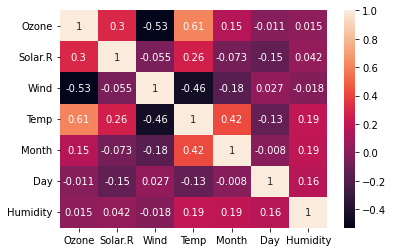

In [18]:
import seaborn as sns
sns.heatmap(co, annot=True)

**MODEL CREATION**

**using linear regression**

In [19]:
x = df1[["Ozone"]]
y = df1[["Temp"]]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)
ypredict = model.predict(xtest)

In [23]:
import matplotlib.pyplot as plt

**PLOTTING GRAPH**

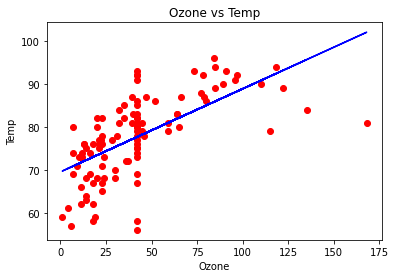

In [24]:
plt.scatter(xtrain, ytrain, color="red")
plt.plot(xtrain, lr.predict(xtrain), color="blue")
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone vs Temp")
plt.show()

**METRICS CALCULATION**

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
MSE = mean_squared_error(ytest,ypredict)
MAE = mean_absolute_error(ytest,ypredict)
r2_score = r2_score(ytest,ypredict)
RMSE = np.sqrt(MSE)

In [27]:
print("MSE : {} \nRMSE : {} \nMAE : {} \nR2 Score : {}".format(MSE, RMSE, MAE, r2_score))

MSE : 60.12257178385421 
RMSE : 7.753874630393131 
MAE : 6.038403222594065 
R2 Score : 0.2964464789262736
